<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/MIAAD_Mate_Week_07_Compramos_el_Producto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GitHub https://github.com/jrebull/MIAAD_Mate/blob/main/MIAAD_Mate_Week_07_Compramos_el_Producto.ipynb

#Javier Rebull MIAAD

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display, Markdown
import sympy as sp

--- Tabla de Datos: Probabilidad de Compra vs. Salario ---


,Salario (miles),Probabilidad
0,6,0.0400
1,7,0.0400
2,8,0.0400
3,9,0.0400
4,10,0.0000
5,11,0.0399
6,12,0.0003
7,13,0.0391
8,14,0.0575
9,15,0.0533



--- Identificación de x_0 a partir de los datos ---
Observando la tabla, cuando el salario es de 20 miles, la probabilidad de compra es 0.5.
Por lo tanto, el valor del parámetro x_0 es: 20
Este valor representa el punto de inflexión de la curva logística.

--- Verificación mediante ajuste de curva ---
El valor de x_0 calculado por el ajuste es: 20.1505
El valor de k (tasa de crecimiento) ajustado es: 0.8993


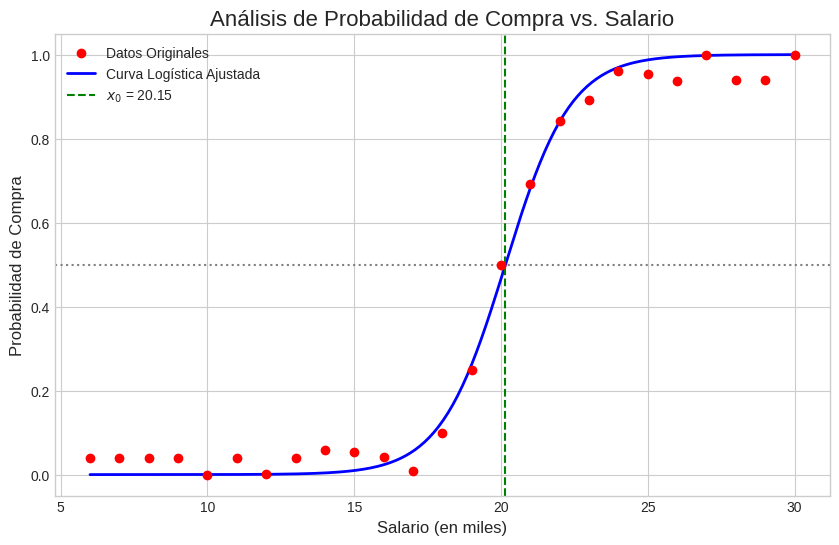

In [ ]:
# ---------- 1. DATOS ORIGINALES ----------
# Se crea un DataFrame de pandas para almacenar y mostrar los datos.
data = {
    'Salario (miles)': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Probabilidad': [0.0400, 0.0400, 0.0400, 0.0400, 0.0000, 0.0399, 0.0003, 0.0391, 0.0575, 0.0533, 0.0420, 0.0074, 0.0992, 0.2489, 0.5000, 0.6911, 0.8408, 0.8926, 0.9620, 0.9533, 0.9375, 0.9991, 0.9397, 0.9399, 1.0000]
}
df = pd.DataFrame(data)

# Se muestra la tabla original de datos
print("--- Tabla de Datos: Probabilidad de Compra vs. Salario ---")
# La función display() ofrece un formato de tabla más agradable en Colab
display(df)


# ---------- 2. IDENTIFICACIÓN DEL PARÁMETRO X_0 ----------

# Como se indica en el análisis, podemos identificar x_0 directamente de los datos,
# ya que la probabilidad es exactamente 0.5 cuando el salario es 20.
x0_observado = df[df['Probabilidad'] == 0.5]['Salario (miles)'].values[0]

print("\n--- Identificación de x_0 a partir de los datos ---")
print(f"Observando la tabla, cuando el salario es de {x0_observado} miles, la probabilidad de compra es 0.5.")
print(f"Por lo tanto, el valor del parámetro x_0 es: {x0_observado}")
print("Este valor representa el punto de inflexión de la curva logística.")

# ---------- 3. AJUSTE DE CURVA LOGÍSTICA (VERIFICACIÓN) ----------
# Para verificar esto computacionalmente, podemos ajustar una función logística a los datos.

# Definición de la función logística:
# f(x) = 1 / (1 + e^(-k*(x - x0)))
def funcion_logistica(x, k, x0):
    return 1 / (1 + np.exp(-k * (x - x0)))

# Extraemos las variables 'x' y 'y' del DataFrame
x_data = df['Salario (miles)']
y_data = df['Probabilidad']

# Usamos 'curve_fit' para encontrar los mejores parámetros 'k' y 'x0'
initial_guess = [0.5, 20] # [k_inicial, x0_inicial]
params, covariance = curve_fit(funcion_logistica, x_data, y_data, p0=initial_guess)

# Extraemos los parámetros optimizados
k_ajustado, x0_ajustado = params

print("\n--- Verificación mediante ajuste de curva ---")
print(f"El valor de x_0 calculado por el ajuste es: {x0_ajustado:.4f}")
print(f"El valor de k (tasa de crecimiento) ajustado es: {k_ajustado:.4f}")


# ---------- 4. VISUALIZACIÓN DE RESULTADOS ----------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos originales
ax.scatter(x_data, y_data, color='red', label='Datos Originales', zorder=5)

# Generar puntos para la curva ajustada
x_fit = np.linspace(df['Salario (miles)'].min(), df['Salario (miles)'].max(), 300)
y_fit = funcion_logistica(x_fit, k_ajustado, x0_ajustado)

# Graficar la curva logística ajustada
ax.plot(x_fit, y_fit, label='Curva Logística Ajustada', color='blue', linewidth=2)

# Resaltar el punto de inflexión x_0
ax.axvline(x=x0_ajustado, color='green', linestyle='--', label=f'$x_0$ = {x0_ajustado:.2f}')
ax.axhline(y=0.5, color='gray', linestyle=':')

# Añadir títulos y etiquetas
ax.set_title('Análisis de Probabilidad de Compra vs. Salario', fontsize=16)
ax.set_xlabel('Salario (en miles)', fontsize=12)
ax.set_ylabel('Probabilidad de Compra', fontsize=12)
ax.legend(loc='best')
ax.set_ylim(-0.05, 1.05)

# Mostrar la gráfica
plt.show()

In [ ]:
# ---------- 1. CONFIGURACIÓN INICIAL DE SYMPY ----------
sp.init_printing(use_latex='mathjax')
x, x0 = sp.symbols('x x_0')
f_x = 1 / (1 + sp.exp(-(x - x0)))
display(Markdown("## 1. Función Logística Original"))
display(sp.Eq(sp.Function('f')(x), f_x))

# ---------- 2. CÁLCULO DE LAS DERIVADAS ----------
df_dx = sp.diff(f_x, x)
d2f_dx2 = sp.diff(df_dx, x)
d3f_dx3 = sp.diff(d2f_dx2, x)
display(Markdown("## 2. Cálculo de Derivadas Simbólicas"))
display(Markdown("### Primera Derivada $f'(x)$"))
display(sp.Eq(sp.Derivative(f_x, x), df_dx.simplify()))
display(Markdown("### Segunda Derivada $f''(x)$"))
display(sp.Eq(sp.Derivative(f_x, (x, 2)), d2f_dx2.simplify()))
display(Markdown("### Tercera Derivada $f'''(x)$"))
display(sp.Eq(sp.Derivative(f_x, (x, 3)), d3f_dx3.simplify()))

# ---------- 3. EVALUACIÓN DE LAS DERIVADAS EN x_0 ----------
x0_val = 20
f_x0 = f_x.subs(x, x0)
df_dx0 = df_dx.subs(x, x0)
d2f_dx2_x0 = d2f_dx2.subs(x, x0)
d3f_dx3_x0 = d3f_dx3.subs(x, x0)
display(Markdown(f"## 3. Evaluación de Derivadas en $x_0 = {x0_val}$"))
display(Markdown(f"El valor de $f({x0_val})$ es: {f_x0}"))
display(Markdown(f"El valor de $f'({x0_val})$ es: {df_dx0}"))
display(Markdown(f"El valor de $f''({x0_val})$ es: {d2f_dx2_x0}"))
display(Markdown(f"El valor de $f'''({x0_val})$ es: {d3f_dx3_x0}"))

# ---------- 4. CONSTRUCCIÓN DEL POLINOMIO DE TAYLOR ----------
c0 = f_x0
c1 = df_dx0
c2 = d2f_dx2_x0 / sp.factorial(2)
c3 = d3f_dx3_x0 / sp.factorial(3)

# Construimos el polinomio sustituyendo los coeficientes
# Esta variable contiene la forma "manual"
P3_manual_form = c0 + c1*(x - x0) + c2*(x - x0)**2 + c3*(x - x0)**3
P3_manual_form = P3_manual_form.subs(x0, x0_val)

# ---------- 5. VERIFICACIÓN DE LAS FORMAS DEL POLINOMIO ----------
display(Markdown("## 5. Verificación de las Formas del Polinomio"))

# Forma 1: Directa de la fórmula de Taylor (tu forma "manual")
display(Markdown("### Forma 'Manual' (Sin expandir)"))
display(Markdown("Esta es la construcción directa del polinomio, tal como en la fórmula de Taylor:"))
display(sp.Eq(sp.Symbol('P_3(x)'), P3_manual_form))

# Forma 2: Expandiendo el término lineal
# Usamos sp.expand() para multiplicar 0.25*(x-20) y agrupar constantes
P3_expanded_form = sp.expand(P3_manual_form)
display(Markdown("### Forma Expandida (Simplificada por SymPy)"))
display(Markdown("Si expandimos el término $0.25(x-20)$ y lo agrupamos con la constante $0.5$, obtenemos la otra forma:"))
display(sp.Eq(sp.Symbol('P_3(x)'), P3_expanded_form))

## 1. Función Logística Original

            1      
f(x) = ────────────
        -x + x₀    
       ℯ        + 1

## 2. Cálculo de Derivadas Simbólicas

### Primera Derivada $f'(x)$

∂ ⎛     1      ⎞          1       
──⎜────────────⎟ = ───────────────
∂x⎜ -x + x₀    ⎟         2⎛x   x₀⎞
  ⎝ℯ        + 1⎠   4⋅cosh ⎜─ - ──⎟
                          ⎝2   2 ⎠

### Segunda Derivada $f''(x)$

 2                  ⎛     x - x₀⎞  x - x₀
∂  ⎛     1      ⎞   ⎝1 - ℯ      ⎠⋅ℯ      
───⎜────────────⎟ = ─────────────────────
  2⎜ -x + x₀    ⎟                   3    
∂x ⎝ℯ        + 1⎠      ⎛ x - x₀    ⎞     
                       ⎝ℯ       + 1⎠     

### Tercera Derivada $f'''(x)$

                    ⎛             2            ⎞        
 3                  ⎜⎛ x - x₀    ⎞       x - x₀⎟  x - x₀
∂  ⎛     1      ⎞   ⎝⎝ℯ       + 1⎠  - 6⋅ℯ      ⎠⋅ℯ      
───⎜────────────⎟ = ────────────────────────────────────
  3⎜ -x + x₀    ⎟                           4           
∂x ⎝ℯ        + 1⎠              ⎛ x - x₀    ⎞            
                               ⎝ℯ       + 1⎠            

## 3. Evaluación de Derivadas en $x_0 = 20$

El valor de $f(20)$ es: 1/2

El valor de $f'(20)$ es: 1/4

El valor de $f''(20)$ es: 0

El valor de $f'''(20)$ es: -1/8

## 5. Verificación de las Formas del Polinomio

### Forma 'Manual' (Sin expandir)

Esta es la construcción directa del polinomio, tal como en la fórmula de Taylor:

                    3    
        x   (x - 20)    9
P₃₍ₓ₎ = ─ - ───────── - ─
        4      48       2

### Forma Expandida (Simplificada por SymPy)

Si expandimos el término $0.25(x-20)$ y lo agrupamos con la constante $0.5$, obtenemos la otra forma:

           3      2             
          x    5⋅x    99⋅x   973
P₃₍ₓ₎ = - ── + ──── - ──── + ───
          48    4      4      6 

In [ ]:
# ---------- 1. DATOS Y DEFINICIÓN DEL POLINOMIO ----------

# Recreamos el DataFrame original con los salarios y las probabilidades reales
data = {
    'Salario': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Valor Real': [0.0400, 0.0400, 0.0400, 0.0400, 0.0000, 0.0399, 0.0003, 0.0391, 0.0575, 0.0533, 0.0420, 0.0074, 0.0992, 0.2489, 0.5000, 0.6911, 0.8408, 0.8926, 0.9620, 0.9533, 0.9375, 0.9991, 0.9397, 0.9399, 1.0000]
}
df = pd.DataFrame(data)

# Definimos el polinomio de Taylor P3(x) como una función de Python
def polinomio_taylor_p3(x):
    """Calcula el valor del polinomio de Taylor de orden 3 centrado en x0=20."""
    x0 = 20
    p3 = 0.5 + 0.25 * (x - x0) - ((x - x0)**3) / 48
    return p3

# ---------- 2. EVALUACIÓN DEL POLINOMIO Y CÁLCULO DE ERROR ----------

# Aplicamos la función del polinomio a cada valor de 'Salario' para obtener la aproximación
df['Aproximación'] = df['Salario'].apply(polinomio_taylor_p3)

# Calculamos el error absoluto para cada fila
df['Error Absoluto'] = abs(df['Valor Real'] - df['Aproximación'])

# Mostramos la tabla comparativa completa
display(Markdown("## 1. Comparación entre Valores Reales y Aproximados"))

# Usamos .style.format() para que los números se vean con 4 decimales, igual que en tu tabla
display(df.style.format({
    'Valor Real': '{:.4f}',
    'Aproximación': '{:.4f}',
    'Error Absoluto': '{:.4f}'
}).hide(axis="index")) # Opcional: .hide() quita los números de índice de la izquierda


# ---------- 3. ANÁLISIS DEL ERROR DE APROXIMACIÓN ----------
display(Markdown("\n## 2. Análisis del Error de Aproximación"))

# Error Promedio
error_promedio = df['Error Absoluto'].mean()
display(Markdown(f"### Error Promedio"))
display(Markdown(f"El error promedio en todo el conjunto de datos es: **{error_promedio:.4f}**"))

# Error Máximo
error_maximo = df['Error Absoluto'].max()
display(Markdown(f"### Error Máximo"))
display(Markdown(f"El error máximo encontrado es: **{error_maximo:.4f}**"))

# Distribución del Error por Rangos
display(Markdown(f"### Distribución del Error por Rangos"))

# Rango cercano: x entre 17 y 23 (inclusive)
rango_cercano_df = df[df['Salario'].between(17, 23)]
error_promedio_cercano = rango_cercano_df['Error Absoluto'].mean()
display(Markdown(f"* **Rango cercano** ($x \\in [17, 23]$): Error promedio = **{error_promedio_cercano:.4f}**"))

# Rango lejano: x menor a 17 o mayor a 23
rango_lejano_df = df[(df['Salario'] < 17) | (df['Salario'] > 23)]
error_promedio_lejano = rango_lejano_df['Error Absoluto'].mean()
display(Markdown(f"* **Rango lejano** ($x < 17$ o $x > 23$): Error promedio = **{error_promedio_lejano:.4f}**"))

## 1. Comparación entre Valores Reales y Aproximados

Salario,Valor Real,Aproximación,Error Absoluto
6,0.0400,54.1667,54.1267
7,0.0400,43.0208,42.9808
8,0.0400,33.5000,33.4600
9,0.0400,25.4792,25.4392
10,0.0000,18.8333,18.8333
11,0.0399,13.4375,13.3976
12,0.0003,9.1667,9.1664
13,0.0391,5.8958,5.8567
14,0.0575,3.5000,3.4425
15,0.0533,1.8542,1.8009



## 2. Análisis del Error de Aproximación

### Error Promedio

El error promedio en todo el conjunto de datos es: **10.5277**

### Error Máximo

El error máximo encontrado es: **54.1267**

### Distribución del Error por Rangos

* **Rango cercano** ($x \in [17, 23]$): Error promedio = **0.0922**

* **Rango lejano** ($x < 17$ o $x > 23$): Error promedio = **14.5860**

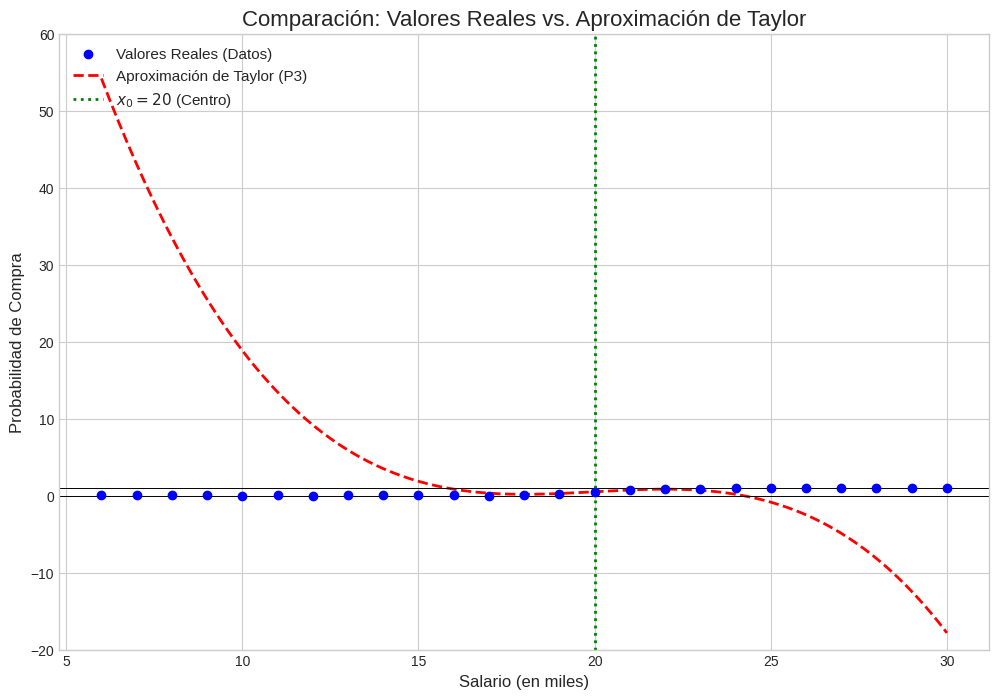

In [ ]:
# --- 1. PREPARACIÓN DE DATOS ---
# Recreamos el DataFrame original y los cálculos de la aproximación.
data = {
    'Salario': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Valor Real': [0.0400, 0.0400, 0.0400, 0.0400, 0.0000, 0.0399, 0.0003, 0.0391, 0.0575, 0.0533, 0.0420, 0.0074, 0.0992, 0.2489, 0.5000, 0.6911, 0.8408, 0.8926, 0.9620, 0.9533, 0.9375, 0.9991, 0.9397, 0.9399, 1.0000]
}
df = pd.DataFrame(data)

# Definimos el polinomio de Taylor P3(x)
def polinomio_taylor_p3(x):
    x0 = 20
    return 0.5 + 0.25 * (x - x0) - ((x - x0)**3) / 48

# Calculamos los valores aproximados
df['Aproximación'] = df['Salario'].apply(polinomio_taylor_p3)


# --- 2. GENERACIÓN DEL GRÁFICO ---
# Configuramos el estilo y tamaño del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# a) Graficar los valores reales como puntos (scatter plot)
ax.scatter(df['Salario'], df['Valor Real'], color='blue', label='Valores Reales (Datos)', zorder=5)

# b) Graficar la función del polinomio de Taylor como una línea continua
# Generamos más puntos para que la curva se vea suave
x_smooth = np.linspace(df['Salario'].min(), df['Salario'].max(), 400)
y_smooth = polinomio_taylor_p3(x_smooth)
ax.plot(x_smooth, y_smooth, color='red', linestyle='--', label='Aproximación de Taylor (P3)', linewidth=2)

# c) Añadir líneas de referencia para mejorar el análisis
ax.axvline(x=20, color='green', linestyle=':', label='$x_0 = 20$ (Centro)', linewidth=2)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
ax.axhline(y=1, color='black', linestyle='-', linewidth=0.7)

# d) Configurar etiquetas, título y leyenda
ax.set_title('Comparación: Valores Reales vs. Aproximación de Taylor', fontsize=16)
ax.set_xlabel('Salario (en miles)', fontsize=12)
ax.set_ylabel('Probabilidad de Compra', fontsize=12)

# Ajustamos el eje Y para poder ver la divergencia del polinomio
ax.set_ylim(-20, 60)
ax.legend(loc='upper left', fontsize=11)

# Mostrar el gráfico
plt.show()

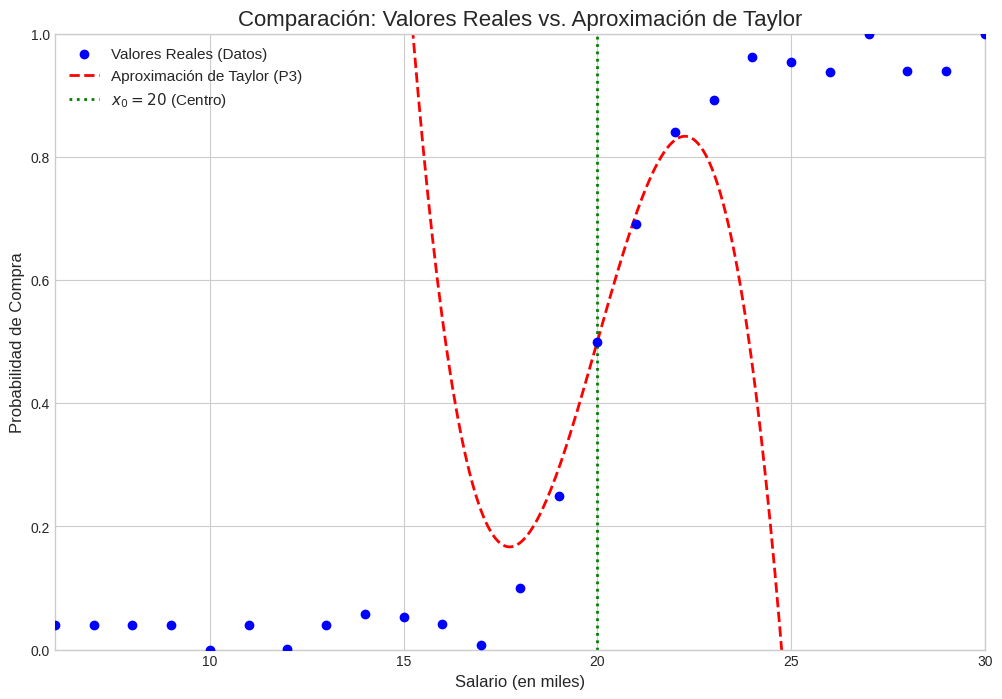

In [8]:
# -*- coding: utf-8 -*-
# Comparación: Valores reales vs. Aproximación de Taylor (P3) centrada en x0=20


# --- 1) DATOS ---------------------------------------------------------------
data = {
    'Salario': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'Valor Real': [0.0400, 0.0400, 0.0400, 0.0400, 0.0000, 0.0399, 0.0003, 0.0391, 0.0575, 0.0533, 0.0420, 0.0074,
                   0.0992, 0.2489, 0.5000, 0.6911, 0.8408, 0.8926, 0.9620, 0.9533, 0.9375, 0.9991, 0.9397, 0.9399, 1.0000]
}
df = pd.DataFrame(data)

# --- 2) POLINOMIO DE TAYLOR P3 ---------------------------------------------
# f(x) = 1 / (1 + exp(-k (x - x0))), centrado en x0
x0 = 20
k = 0.8844  # coincide con el documento

def polinomio_taylor_p3(x, x0=x0, k=k):
    # P3(x) = 0.5 + (k/4)(x-x0) - (k^3/48)(x-x0)^3
    dx = (x - x0)
    return 0.5 + (k/4.0)*dx - (k**3/48.0)*(dx**3)

# Valores aproximados en los puntos de salario
df['Aproximación'] = df['Salario'].apply(polinomio_taylor_p3)

# --- 3) GRÁFICO PRINCIPAL (en probabilidades 0..1) -------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# a) Datos reales
ax.scatter(df['Salario'], df['Valor Real'], color='blue', label='Valores Reales (Datos)', zorder=5)

# b) Curva suave del P3
x_smooth = np.linspace(df['Salario'].min(), df['Salario'].max(), 400)
y_smooth = polinomio_taylor_p3(x_smooth)
ax.plot(x_smooth, y_smooth, color='red', linestyle='--', linewidth=2, label='Aproximación de Taylor (P3)')

# c) Líneas de referencia
ax.axvline(x=x0, color='green', linestyle=':', linewidth=2, label='$x_0 = 20$ (Centro)')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
ax.axhline(y=1, color='black', linestyle='-', linewidth=0.7)

# d) Etiquetas y límites
ax.set_title('Comparación: Valores Reales vs. Aproximación de Taylor', fontsize=16)
ax.set_xlabel('Salario (en miles)', fontsize=12)
ax.set_ylabel('Probabilidad de Compra', fontsize=12)
ax.set_ylim(0, 1)      # Probabilidades
ax.set_xlim(6, 30)
ax.legend(loc='upper left', fontsize=11)

plt.show()




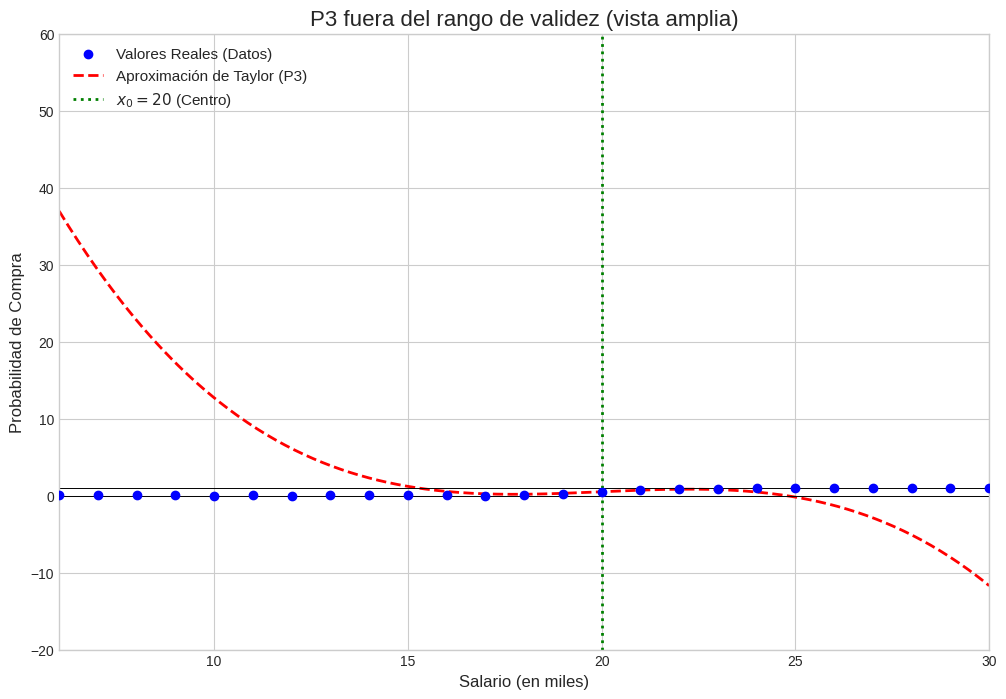

In [10]:
# --- (OPCIONAL) GRÁFICO AMPLIO PARA VER DIVERGENCIA ------------------------
fig2, ax2 = plt.subplots(figsize=(12, 8))
ax2.scatter(df['Salario'], df['Valor Real'], color='blue', label='Valores Reales (Datos)', zorder=5)
ax2.plot(x_smooth, y_smooth, color='red', linestyle='--', linewidth=2, label='Aproximación de Taylor (P3)')
ax2.axvline(x=x0, color='green', linestyle=':', linewidth=2, label='$x_0 = 20$ (Centro)')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.7)
ax2.axhline(y=1, color='black', linestyle='-', linewidth=0.7)
ax2.set_title('P3 fuera del rango de validez (vista amplia)', fontsize=16)
ax2.set_xlabel('Salario (en miles)', fontsize=12)
ax2.set_ylabel('Probabilidad de Compra', fontsize=12)
ax2.set_ylim(-20, 60)  # para observar divergencia
ax2.set_xlim(6, 30)
ax2.legend(loc='upper left', fontsize=11)
plt.show()